# Classification

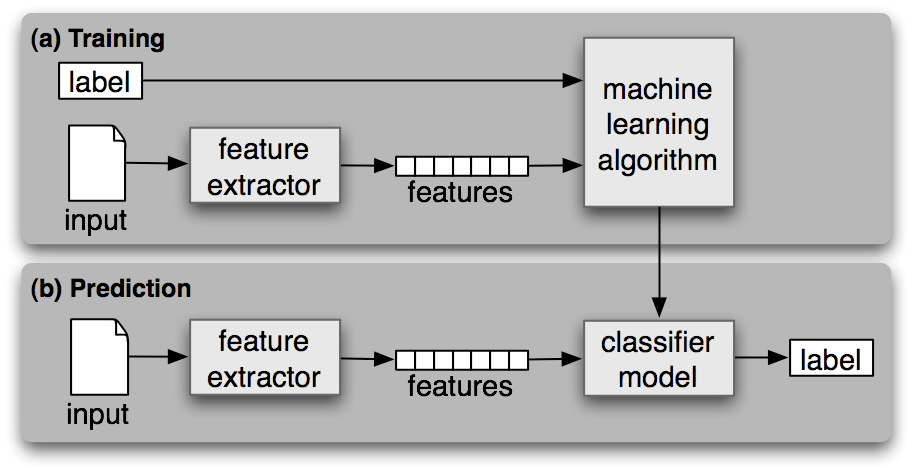

## The dataset

The dataset here is a list of names that people have labeled as either male or female.

I wondered, a bit, whether thas is no longer an appropriate exercise. 

What I decided: It’s not appropriate as long as we don't think that there are right and wrong answers. Instead we should think of this as an attempt to understand what people are responding to when they see a name as male or female. Viewing this as a kind of exploration of how we think about names and gender makes this even a bit more interesting. 

In [ ]:
from utilities import read_and_tokenize
import random
male_names = read_and_tokenize('male.txt')
female_names = read_and_tokenize('female.txt')

In [ ]:
print(female_names[:25])

In [ ]:
male_nameset = [(n, 'male') for n in male_names]
female_nameset = [(n, 'female') for n in female_names]

In [ ]:
print(male_nameset[:15])

In [ ]:
name_set = male_nameset + female_nameset

In [ ]:
len(name_set)

In [ ]:
random.shuffle(name_set)

## The basic procedure

### Extracting features

Recall that the input to our machine learning algorithms will be *labeled featuresets*. So we must convert each piece of data to a featureset. 

This "feature engineering" is where much of the craft lives.

In [ ]:
def gender_features(word):
    return {'first_letter': word[0], 'last_letter': word[-1], 'next_to_last': word[-2], 'last_two': word[-2:]}

In [ ]:
labeled_feature_sets = [(gender_features(n), g) for (n, g) in name_set]

In [ ]:
print(name_set[:2])

In [ ]:
for fs in labeled_feature_sets[:2]:
    print(fs)

### Splitting into training and test sets

In [ ]:
train_set = labeled_feature_sets[800:]
test_set = labeled_feature_sets[:800]

### Create and train a classifier

There are many machine learning algorithms that we can use.
From a practical point of view, switching from one algorithm to another can be as easy as changing part of line line of code. But you might want to change other parts of the pipeline.

We're going to start by making use of an algorithm called Naive Bayes, in part because it's relatively easy to explain how it works. (I'm going to explain it in a bit.)

In [ ]:
import nltk
name_classifier = nltk.NaiveBayesClassifier.train(train_set)

### Test it

In [ ]:
name_classifier.classify(gender_features('neo'))

In [ ]:
name_classifier.classify(gender_features('trinity'))

In [ ]:
name_classifier.classify(gender_features('Bruce'))

In [ ]:
nltk.classify.accuracy(name_classifier, test_set)

In [ ]:
test_names = name_set[:500]

In [ ]:
errors = []
for (name, tag) in test_names:
    guess = name_classifier.classify(gender_features(name))
    if guess != tag:
        errors.append((name, tag))

In [ ]:
for error in errors:
    print(error)

In [ ]:
gold_list = [t[1] for t in test_names]
test_list = [name_classifier.classify(gender_features(t[0])) for t in test_names]
cm = nltk.ConfusionMatrix(gold_list, test_list)
print(cm)

In [ ]:
name_classifier.show_most_informative_features(25) 

### Ideas for other features to try in our feature extractor?

## How Naive Bayes works

### The problem

We want to know the probability that of a given label given a set of features:

$\large P(L|f_1+f_2+f_3+...)$

Using the training set, we can easily gather data about how often a feature occurs
with a given label

$\large P(f_1|L), P(f_2|L), P(f_3|L)$

So, the question is, can we get to the former from the latter?

### The solution: Bayes theorem plus some fudging

The answer is yes, with a bit of fudging.

Bayes theory will let us flip the L and fs.
Being "naive" will let us split up the fs.

## Decision trees

Image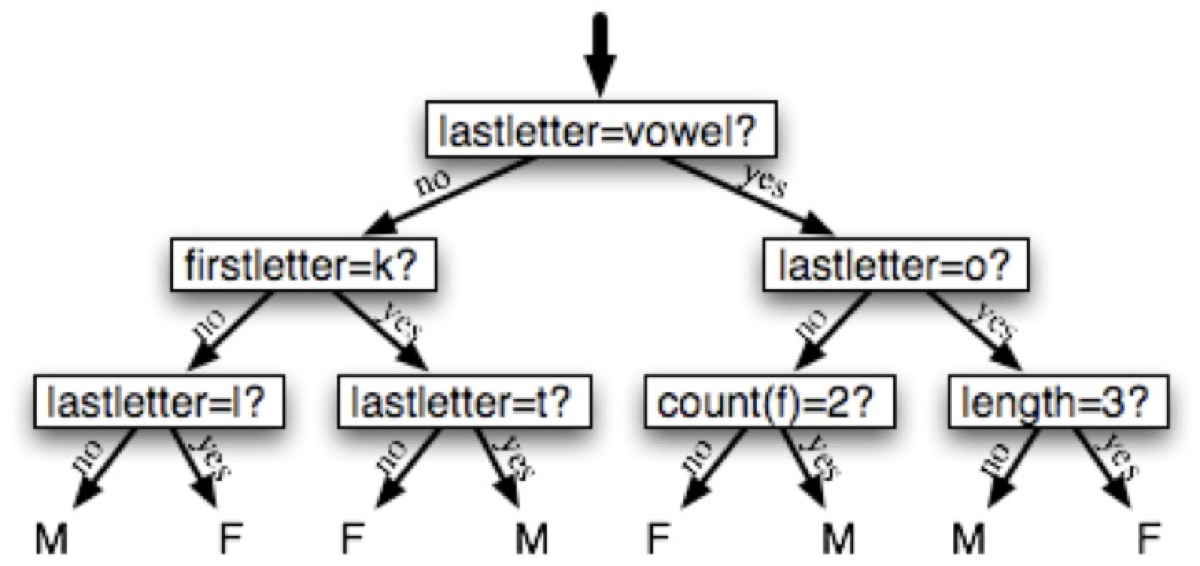

In [ ]:
dtclassifier = nltk.DecisionTreeClassifier.train(train_set)

In [ ]:
dtclassifier.classify(gender_features('bruce'))

In [ ]:
print(dtclassifier.pseudocode(depth=4))

In [ ]:
nltk.classify.accuracy(dtclassifier, test_set)

In [ ]:
gold_list = [t[1] for t in test_names]
test_list = [dtclassifier.classify(gender_features(t[0])) for t in test_names]
cm = nltk.ConfusionMatrix(gold_list, test_list)
print(cm)